In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Chicago_Crime_Detective.csv",index_col=[0])

c:\users\raghav jindal\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [5]:
df.dtypes

ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object

In [6]:
df.Date = pd.to_datetime(df.Date)
print(df.Date)

0        2012-12-31 23:15:00
1        2012-12-31 22:00:00
2        2012-12-31 22:00:00
3        2012-12-31 22:00:00
4        2012-12-31 21:30:00
                 ...        
191636   2001-01-01 00:05:00
191637   2001-01-01 00:01:00
191638   2001-01-01 00:01:00
191639   2001-01-01 00:01:00
191640   2001-01-01 00:01:00
Name: Date, Length: 191641, dtype: datetime64[ns]


In [7]:
df.dtypes

ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

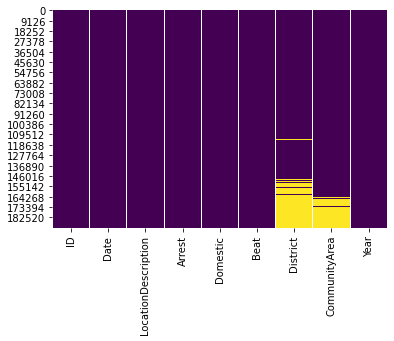

In [8]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

In [9]:
Dates = df["Date"]

In [10]:
Dates

0        2012-12-31 23:15:00
1        2012-12-31 22:00:00
2        2012-12-31 22:00:00
3        2012-12-31 22:00:00
4        2012-12-31 21:30:00
                 ...        
191636   2001-01-01 00:05:00
191637   2001-01-01 00:01:00
191638   2001-01-01 00:01:00
191639   2001-01-01 00:01:00
191640   2001-01-01 00:01:00
Name: Date, Length: 191641, dtype: datetime64[ns]

In [11]:
Dates.sort_values()

191640   2001-01-01 00:01:00
191637   2001-01-01 00:01:00
191639   2001-01-01 00:01:00
191638   2001-01-01 00:01:00
191634   2001-01-01 00:05:00
                 ...        
4        2012-12-31 21:30:00
3        2012-12-31 22:00:00
2        2012-12-31 22:00:00
1        2012-12-31 22:00:00
0        2012-12-31 23:15:00
Name: Date, Length: 191641, dtype: datetime64[ns]

In [12]:
len(Dates)

191641

In [13]:
len(Dates)/2

95820.5

In [14]:
Dates[95820]

Timestamp('2006-05-21 12:30:00')

In [15]:
Dates[95821]

Timestamp('2006-05-21 12:00:00')

In [16]:
month = df['Date'].apply(lambda x:x.month)
month

0         12
1         12
2         12
3         12
4         12
          ..
191636     1
191637     1
191638     1
191639     1
191640     1
Name: Date, Length: 191641, dtype: int64

In [17]:
day = df['Date'].apply(lambda x:x.day)
day

0         31
1         31
2         31
3         31
4         31
          ..
191636     1
191637     1
191638     1
191639     1
191640     1
Name: Date, Length: 191641, dtype: int64

In [18]:
df2 = df.copy()
df2['month'] = df2['Date'].apply(lambda x:x.month)
df2['day'] = df2['Date'].apply(lambda x:x.day)
df2.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,31
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,31
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,31
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,31
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,31


In [19]:
day = df2["Date"].dt.weekday
day


0         0
1         0
2         0
3         0
4         0
         ..
191636    0
191637    0
191638    0
191639    0
191640    0
Name: Date, Length: 191641, dtype: int64

In [20]:
pd.value_counts(day).sort_values()  # 0 Monday 6 Sunday

6    26316
1    26791
5    27118
3    27319
0    27397
2    27416
4    29284
Name: Date, dtype: int64

In [21]:
monthly = pd.value_counts(df2['month'])
monthly

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: month, dtype: int64

In [22]:
monthly.sort_values()

2     13511
4     15280
3     15758
6     16002
5     16035
1     16047
9     16060
11    16063
12    16426
8     16572
7     16801
10    17086
Name: month, dtype: int64

crimes_month = df2.copy()
crimes_month = crimes_month.groupby('month').size().reset_index(name = "No. of Crimes")


fig = plt.figure(figsize=(16,10))
sns.pointplot(data=crimes_month , x='month',colour='blue')

plt.xlabel('Month')
plt.ylabel('No of Crimes')
plt.title("No. of Crimes by Month")
plt.show()

In [23]:
Arrest_True = df2.copy()
Arrest_True = df2.groupby('month').size()
Arrest_True 

month
1     16047
2     13511
3     15758
4     15280
5     16035
6     16002
7     16801
8     16572
9     16060
10    17086
11    16063
12    16426
dtype: int64

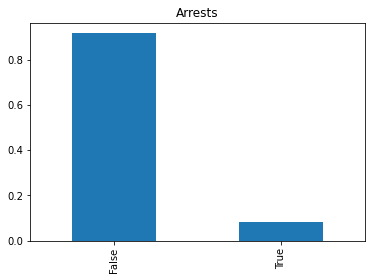

In [24]:
df2['Arrest'].value_counts(normalize=True).plot.bar()
plt.title("Arrests")
plt.show()

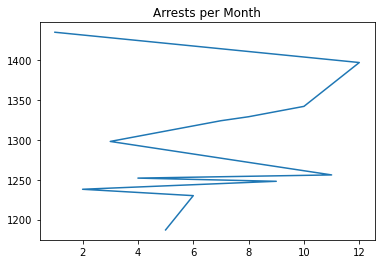

In [25]:
df2[df2.Arrest == True]['month'].value_counts().plot.line()
plt.title("Arrests per Month")
plt.show()

In [26]:
df2[df2.Arrest == True]['month'].value_counts().sort_values()

5     1187
6     1230
2     1238
9     1248
4     1252
11    1256
3     1298
7     1324
8     1329
10    1342
12    1397
1     1435
Name: month, dtype: int64

In [27]:
df2[df2.Year >2000 ]['Year'].value_counts().sort_values()

2009    12167
2012    14092
2007    14280
2008    14445
2010    15497
2011    15637
2006    16098
2005    16484
2003    16657
2004    16862
2002    18753
2001    20669
Name: Year, dtype: int64

In [28]:
df2[(df2.Year >=2002 ) & ( df2.Year <= 2013)]['Year'].value_counts().sum()

170972

In [29]:
df2[(df2.Year >=2005 ) & ( df2.Year <= 2008)]['Year'].value_counts().sum()

61307

In [30]:
df2[(df2.Year >=2009 ) & ( df2.Year <= 2011)]['Year'].value_counts().sum()

43301

In [31]:
df2[(df2.Year >=2001 ) & ( df2.Year <= 2007) & (df2.Arrest == True)]['Year'].value_counts().sum()

11800

In [32]:
df2[(df2.Year >=2007 ) & ( df2.Year <= 2012) & (df2.Arrest == True)]['Year'].value_counts().sum()

4948

In [33]:
df2['LocationDescription'].value_counts().head(10)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
RESIDENTIAL YARD (FRONT/BACK)       1536
RESIDENCE                           1302
RESIDENCE-GARAGE                    1176
VACANT LOT/LAND                      985
Name: LocationDescription, dtype: int64

In [34]:
df3=df2.copy()
df3['weekday'] = df3['Date'].dt.weekday


In [35]:
df3

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day,weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,31,0
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,31,0
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,31,0
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,31,0
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...
191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,1,1,0
191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1,1,0
191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1,1,0
191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1,1,0


In [36]:
df3[(df3.LocationDescription == "GAS STATION")]["weekday"].value_counts().sort_values()

1    270
2    273
0    280
3    282
4    332
6    336
5    338
Name: weekday, dtype: int64

In [37]:
Top5 = df3[ (df3.LocationDescription=="STREET") |
           (df3.LocationDescription=="PARKING LOT/GARAGE(NON.RESID.)") | 
           (df3.LocationDescription=="ALLEY") | 
           (df3.LocationDescription=="GAS STATION") |
           (df3.LocationDescription=="DRIVEWAY - RESIDENTIAL")]

Top5

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day,weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,31,0
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,31,0
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,31,0
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,31,0
5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,12,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...
191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,1,1,0
191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1,1,0
191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1,1,0
191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1,1,0


In [38]:
Top5.count()

ID                     177510
Date                   177510
LocationDescription    177510
Arrest                 177510
Domestic               177510
Beat                   177510
District               137526
CommunityArea          154663
Year                   177510
month                  177510
day                    177510
weekday                177510
dtype: int64

In [39]:
df3[df3.Year == 2001]["Arrest"].value_counts()

False    18517
True      2152
Name: Arrest, dtype: int64

In [40]:
2152/18517

0.11621752983744667

In [41]:
2152+18517

20669

In [42]:
2152/20669

0.10411727708161982

In [43]:
df3[df3.Year == 2007]["Arrest"].value_counts()

False    13068
True      1212
Name: Arrest, dtype: int64

In [44]:
13068 + 1212

14280

In [45]:
1212/14280

0.08487394957983194